# Laboratorio 5

Integrantes: 

    - Francis Aguilar - 22243 
    - Diego García - 22404 
    - Angela García -22869 

enlace al repositorio: https://github.com/angelargd8/lab5-modsim

# Parte 1
## Teoría 

**1. ¿Cuál es la característica más definitoria de una red libre de escala que la diferencia de una red aleatoria (Erdős-Rényi)? Explique por qué esta característica obliga a los modeladores a ir más allá de los modelos que se basan únicamente en propiedades promedio (como el modelo SIR clásico).** 

La característica más definitoria de una red libre de escala que la diferencia de una red aleatoria es la distribución de gradoss con cola pesada y la existencia de hubs, la diferencia es que en una red aleatoria la distribución de grados sigue la distribución de Poisson, mientras que la red libre de escala sigue la de la ley de la potencia. Esto lo que hace es que obliga a los modelos homógeneos promedio como el SIR, porque los hubs dominan la dinámica de propagación y no se puede ignorar con un número promedio de contactos. 

**2. Considere la fórmula de la ley de potencia vista en clase. ¿Qué implica un valor menor de gamma (por ejemplo, 2,1 frente a 3,5) sobre la prevalencia de nodos altamente conectados en la red?**

Si gamma tuviera un valor de 3.5, sería un valor alto, entonces la probabilidad decae rápido, la red todavía tendría hubs, aunque los nodos con muchas conexiones sería raro y la red sería homogénea. 
Y si gamma tuviera 2.1 sería un valor bajo, y la probabilidad decaería lentamente, porque la cola sería pesada y los nodos tendrían un grado muy alto y más frecuentes. Además, al tener una mayor prevalencia la red es más heterogénea.


**3. ¿Por qué el número reproductivo básico R0 para una enfermedad que se propaga en una red libre de escala depende de la varianza de la distribución de grados, no solo de la media?**

El R0 en redes libres de escala depende de la varianza porque los hubs los que son pocos pero muy conectados dominan la transmisión y al ignorar la varianza y si solo se usa la media, entonces subestimaría el portencial de propagación. Ya que se tiene que tomar en cuenta que en las redes libres existe la escala la heterogeneidad. Por lo tanto, no todos los nodos tienen el mismo grado, ya que unos tienen hubs con miles de conexiones. 



**4. ¿Por qué las intervenciones dirigidas (p. ej., centrar las pruebas, el uso de mascarillas o la vacunación en los centros de la red) son particularmente eficaces y eficientes en una red sin escala en comparación con una red aleatoria? Explíquelo desde una perspectiva matemática y práctica.**

En una red aleatoria, la distribución de grados es aproximadamente Poisson, la mayoría de los nodos tienen un número de conexiones cercano a la media y todos los nodos son parecidos.

Se tiene que tomar en cuenta que el número reproducitov básico se aproxima como:
$$
R_0 ∝ β * (⟨k^2⟩​)/(⟨k⟩)
$$
Y dado a que
$$
⟨k^2⟩ ≈⟨k^2⟩ + ⟨k⟩
$$


Entonces si solo se atacan unos pocos realmente no va a cambiar el promedio.


Mientras, que en la red libre escala, la distribución sigue la ley de la potencia que es 
$$
P(k) ∼ k^{\text{−γ}}
$$

Y eso implica que ⟨k^2⟩ puede ser muy grande o divergir cuando γ =< 3 
$$
⟨k^2⟩ ≈⟨k^2⟩ + ⟨k⟩
$$
y aquí pocos hubs se inflan de manera desproporcionada y si se eliminan o se protegen a esos hubs ⟨k^2⟩ se reduce draticamente.

Entonces, la heterogeneidad que hacen las redes libres de escala más vulnerables a epidemuas también las hacec más fáciles de controlar si se actua de una forma dirigida.




## Práctica

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Reproducibilidad
NP_SEED = 42
NX_SEED = 42
rng = np.random.default_rng(NP_SEED)

In [3]:
# === Parámetros globales de la práctica ===
N = 1000         # número de nodos
m = 3            # parámetro Barabási–Albert

G_ba = None; deg_ba = None; mean_ba = None; var_ba = None
G_er = None; deg_er = None; mean_er = None; var_er = None


Barabási–Albert

In [4]:
# Red libre de escala (Barabási–Albert)
G_ba = nx.barabasi_albert_graph(N, m, seed=NX_SEED)

print("Nodos:", G_ba.number_of_nodes(), " | Aristas:", G_ba.number_of_edges())


Nodos: 1000  | Aristas: 2991


In [5]:
deg_ba = np.fromiter((d for _, d in G_ba.degree()), dtype=int)
mean_ba = float(deg_ba.mean())
var_ba  = float(deg_ba.var(ddof=0))

print(f"BA — N={len(deg_ba)}, k̄={mean_ba:.3f} (≈ esperado {2*m}), Var={var_ba:.3f}, "
      f"k_min={deg_ba.min()}, k_max={deg_ba.max()}")

BA — N=1000, k̄=5.982 (≈ esperado 6), Var=52.766, k_min=3, k_max=93


Erdős-Rényi

In [7]:
target_k = mean_ba

p = target_k / (N - 1)

for _ in range(2):
    G_er = nx.erdos_renyi_graph(N, p, seed=NX_SEED)
    deg_tmp = np.fromiter((d for _, d in G_er.degree()), dtype=int)
    mean_tmp = float(deg_tmp.mean())
    if abs(mean_tmp - target_k) <= 0.1:
        break
    # ajuste proporcional suave
    if mean_tmp > 0:
        p = p * (target_k / mean_tmp)
    p = min(max(p, 0.0), 1.0)  # clamp


In [8]:
deg_er = np.fromiter((d for _, d in G_er.degree()), dtype=int)
mean_er = float(deg_er.mean())
var_er  = float(deg_er.var(ddof=0))

print(f"ER — N={len(deg_er)}, k̄={mean_er:.3f} (objetivo ≈ {target_k:.3f}), "
      f"Var={var_er:.3f}, k_min={deg_er.min()}, k_max={deg_er.max()}, p={p:.6f}")


ER — N=1000, k̄=6.016 (objetivo ≈ 5.982), Var=6.230, k_min=0, k_max=15, p=0.005988


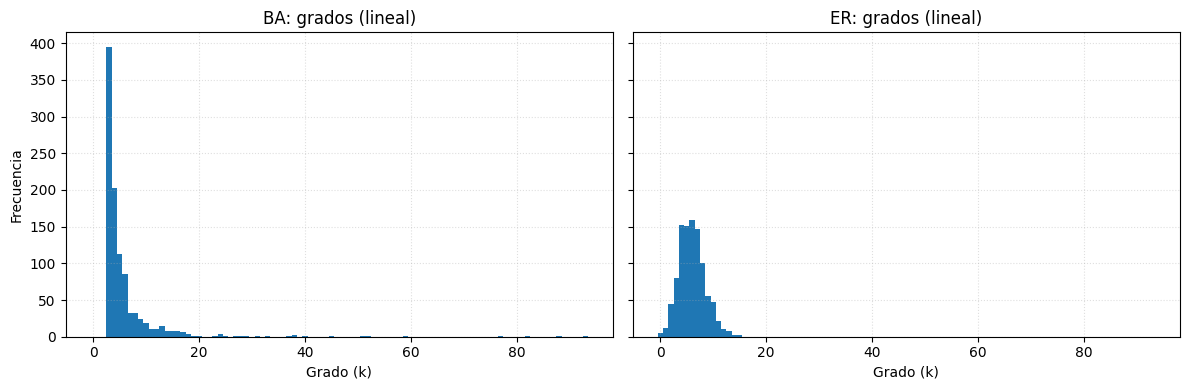

In [ ]:
# Bins centrados en enteros, usando el mismo rango para ambas
kmax = int(max(deg_ba.max(), deg_er.max()))
bins = np.arange(-0.5, kmax + 1.5, 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# BA
axes[0].hist(deg_ba, bins=bins)
axes[0].set_title("BA: grados (lineal)")
axes[0].set_xlabel("Grado (k)")
axes[0].set_ylabel("Frecuencia")
axes[0].grid(True, linestyle=":", alpha=0.4)

# ER
axes[1].hist(deg_er, bins=bins)
axes[1].set_title("ER: grados (lineal)")
axes[1].set_xlabel("Grado (k)")
axes[1].grid(True, linestyle=":", alpha=0.4)

plt.tight_layout()
plt.show()


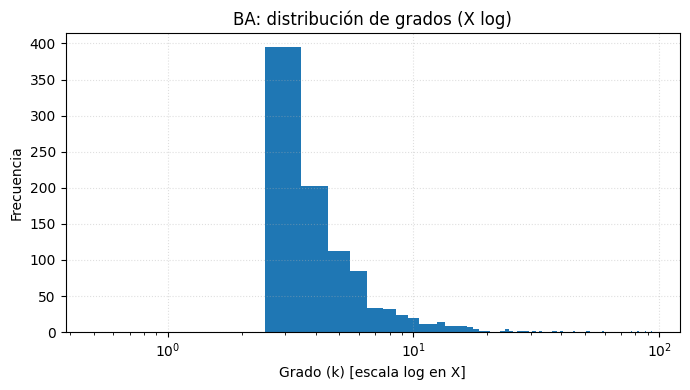

In [ ]:
# Histograma BA con X en log
kmax_ba = int(deg_ba.max())
bins_ba = np.arange(-0.5, kmax_ba + 1.5, 1)

plt.figure(figsize=(7,4))
plt.hist(deg_ba, bins=bins_ba)
plt.xscale("log")
# plt.yscale("log")  # <- descomenta esto para log–log
plt.xlabel("Grado (k) [escala log en X]")
plt.ylabel("Frecuencia")
plt.title("BA: distribución de grados (X log)")
plt.grid(True, linestyle=":", alpha=0.4)
plt.tight_layout()
plt.show()


### Informe de hallazgos

**Describe la marcada diferencia en la forma de los dos histogramas de escala lineal. ¿Qué te dice la forma de la distribución de la red sin escala sobre su estructura?**
BA tiene varios puntos bajos que crean una cola en comparación con los puntos altos. ER es más simétrica en la media y es bastante más baja que BA. Esta forma muestra la estructura basada en hubs que tiene el BA (sin escala), así como su heterogeneidad extrema. Estos concretan enlaces y pueden dominar procesos de difusión como los de epidemia.

**¿Qué revela el gráfico logarítmico de la distribución de grados de la red sin escala?¿Qué confirma la línea de tendencia aproximadamente lineal?**<br>
El gráfico logaritmico de la disrtibución BA muestra una cola casi lineal, lo que demuestra la ley de potencia aproximada
$$
P(k) ∼ k^{\text{−γ}}
$$
Esta tendencia casi lineal confirma la falta de escala típica de grado y presencia de hubs que dominan la conectividad y la dinámica de propagación.

**Reporte la media y la varianza de cada red. ¿Cómo se comparan los valores de varianza? ¿Por qué esta diferencia es crucial para modelar procesos como la propagación de epidemias?**
La media de BA fue de 5.982 y la de ER de 6.016, lo que las hace muy parecidas. La varianza, por otro lado, es de 52.766 para BA y 6.230 para ER, lo que significa que BA es bastante dispersa, mientras que ER es más concentrada. Con esto, se puede decir que BA muestra una heterogeneidad estructural que reduce el umbral epidémico y favorece una rápida propación. Y para ER, se tiene algo más robusto al contagio pero menos eficiente para la difusión. 

**Según tu análisis, si se introdujera un nuevo patógeno en cada una de estas redes sintéticas, ¿cuál tendría más probabilidades de causar una epidemia rápida y a gran escala? Explica por qué, haciendo referencia a la estructura de red que observaste.**
La red BA (sin escala) sería la que causaría una epidemia más rápida y grande. Esto porque sus hubs crean rutas cortas y múltiples contacos de alto grado, lo que facilita los brotes, haciendolos más rápidos y extensos.  

# Parte 2


## Teoría 
**1. Usted es un analista de infraestructura crítica encargado de evaluar dos sistemas: la red nacional de
aeropuertos (que se aproxima a un modelo libre de escala) y la red de alcantarillado de una ciudad (que se
aproxima a un retículo o red de mundo pequeño con pocas conexiones largas).**  

**¿Cuál de las dos redes es más vulnerable a fallos aleatorios (ej. una tubería se rompe al azar o un aeropuerto pequeño cierra por maltiempo)? ¿Y cuál es más vulnerable a ataques dirigidos (ej. un ataque coordinado a los 5 aeropuertos más
grandes o a las 5 estaciones de bombeo principales)? Justifique su respuesta basándose en la distribución
de grado y la presencia de hubs en cada modelo.**

La red de aeropuertos que es como un modelo libre de escala, es el más vulnerable a ataques dirigidos en contra directamente de sus hubs (que serían los aeropuertos grandes), pero se defiende bien de fallos aleatorios. Por otro lado, la red de alcantarillado (mundo pequeño) es más vulnerable contra fallos aleatorios, ya que tienden a "fragmentarla". Estas redes son menos dependientes a hubs externos, a acomparación de las de libre de escala, por lo que eso lo hace menos vulnerable ante ataques dirigidos. A menos que, el ataque sea dirigido estrategicamente a un hub crítico, el mundo pequeño tiende a ser menos vulnerable que un modelo libre de escala. 


**2. El modelo de Barabási-Albert asume dos condiciones clave: (1) la red está en constante crecimiento y (2) los
nuevos nodos se conectan con preferencia a los nodos más conectados. Describa un ejemplo de una red
del mundo real donde al menos una de estas dos suposiciones no se cumpla. Explique por qué el modelo
Barabási-Albert sería una representación inadecuada para esa red.**


Un ejemplo de red donde no se cumplen las condiciones del modelo de Barabási-Albert puede ser la red eléctrica de un país. Este tipo de red no crece de forma constante, sino que su expansión ocurre de manera controlada según las necesidades energéticas de las personas y se hace de manera planificada. Además, cuando se añaden nuevos nodos, como subestaciones o plantas generadoras, no se conectan preferentemente a los nodos más conectados, sino a aquellos que optimizan la eficiencia del sistema. Por esto, el modelo de Barabási-Albert resulta inadecuado para representar la red eléctrica, ya que este modelo genera redes libres de escala con hubs muy conectados, mientras que las redes eléctricas buscan evitar concentraciones excesivas de conexiones para reducir riesgos y mantener la estabilidad del sistema.


**3. En el modelo de Watts-Strogatz, el parámetro de recableado p es la clave para sintonizar la red entre orden
y aleatoriedad. Describa qué sucede con el coeficiente de agrupamiento promedio y la longitud de camino
promedio de la red a medida que p varía desde 0 hasta 1. ¿Por qué un valor de p muy pequeño (ej. 0.01) es
tan efectivo para reducir drásticamente la longitud del camino promedio sin destruir el agrupamiento local?**


En el modelo de Watts-Strogatz, el parámetro de recableado ( p ) determina el equilibrio entre orden y aleatoriedad. Cuando ( p = 0 ), la red es totalmente regular, con un alto coeficiente de agrupamiento y una gran longitud de camino promedio. A medida que ( p ) aumenta ligeramente, algunas conexiones se recablean al azar, creando atajos que reducen drásticamente la distancia promedio entre nodos, mientras el agrupamiento local se mantiene casi intacto. En cambio, cuando ( p ) se acerca a 1, la red se vuelve aleatoria, el camino promedio es muy corto, pero el agrupamiento disminuye notablemente. Un valor pequeño de ( p ) (como 0.01) es tan eficaz porque unos pocos enlaces aleatorios bastan para acortar las distancias sin destruir la estructura local del retículo.


**4. Piense en la red de amistades dentro de una red social como Facebook o Instagram. Esta red muestra
características de varios modelos: tiene comunidades muy unidas (grupos de la universidad, compañeros
de trabajo), lo que sugiere un modelo de mundo pequeño. Al mismo tiempo, tiene "influencers" o celebridades
con millones de seguidores, lo que es característico de una red libre de escala. ¿Cómo podría un modelo de
simulación capturar ambas propiedades? Proponga una regla generativa conceptual (no necesita escribir
código) para construir una red que sea a la vez comunitaria y tenga hubs.**


Para construir una red que combine comunidades fuertemente conectadas y la presencia de hubs, se puede seguir una regla generativa conceptual en la que primero se crean varias comunidades locales densamente interconectadas, como grupos de amigos, compañeros de trabajo o estudiantes, utilizando un modelo similar al de Watts-Strogatz para asegurar un alto agrupamiento. Luego, se añaden algunas conexiones aleatorias entre comunidades, que actúan como puentes y reducen la distancia promedio entre nodos, manteniendo la propiedad de mundo pequeño. Finalmente, se introduce un mecanismo de preferencia de conexión, de modo que los nuevos nodos o enlaces tienden a conectarse con aquellos que ya tienen muchos vínculos, generando hubs o “influencers” de alto grado. Esta combinación de estructura comunitaria y conexión preferencial permite capturar tanto la cohesión local como la desigualdad en popularidad que caracterizan a redes sociales reales como Facebook o Instagram.



## Práctica
### Problema 1

Uno de los descubrimientos más importantes sobre las redes aleatorias es que no se vuelven conectadas de forma
gradual. En su lugar, experimentan una "transición de fase": por debajo de un umbral crítico de probabilidad de
conexión p, la red está fragmentada en muchas islas pequeñas. Justo en ese umbral, un "componente gigante"
emerge repentinamente. Su tarea es visualizar este fenómeno

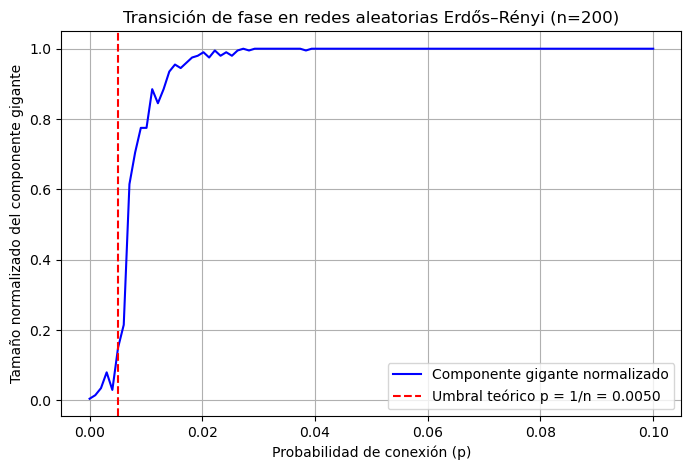

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

n = 200
p_values = np.linspace(0, 0.1, 100)  # 100 valores de p entre 0 y 0.1

largest_components = []

# Simulación
for p in p_values:
    # Crear red aleatoria G(n, p)
    G = nx.erdos_renyi_graph(n, p)
    
    # Si no hay aristas, el componente gigante tiene tamaño 1
    if len(G.edges) == 0:
        largest_components.append(1 / n)
        continue
    
    # Obtener componentes conectados
    components = list(nx.connected_components(G))
    
    # Encontrar el tamaño del componente más grande
    largest = max(components, key=len)
    normalized_size = len(largest) / n
    
    largest_components.append(normalized_size)

#  Umbral teórico de conectividad
p_threshold = 1 / n

plt.figure(figsize=(8, 5))
plt.plot(p_values, largest_components, '-b', label='Componente gigante normalizado')
plt.axvline(p_threshold, color='r', linestyle='--', label=f'Umbral teórico p = 1/n = {p_threshold:.4f}')

plt.title('Transición de fase en redes aleatorias Erdős–Rényi (n=200)')
plt.xlabel('Probabilidad de conexión (p)')
plt.ylabel('Tamaño normalizado del componente gigante')
plt.legend()
plt.grid(True)
plt.show()


### Preguntas de Análisis:
1. **Observe su gráfica. ¿La transición de un estado fragmentado a uno conectado es gradual o abrupta?
¿Alrededor de qué valor de p ocurre este cambio brusco?**

En la gráfica podemos observar que es de manera abrupta, lo cual tiene sentido para una red como está y representaría la transición de fase. En la gráfica, el tamaño del componente gigante permanece muy bajo para valores pequeños de p, y luego aumenta bruscamente alrededor de p ≈ 0.005, pasando de una red con muchas islas pequeñas a una donde casi todos los nodos están conectados en un solo componente.

2. **La línea roja discontinua muestra el umbral teórico p = 1/n. ¿Cómo se compara la transición que observó
en su simulación con este valor teórico?**

En la simulación, el cambio abrupto en el tamaño del componente gigante ocurre muy cerca de este valor, lo que confirma la validez de la predicción teórica. Aunque puede haber pequeñas variaciones debido a la naturaleza aleatoria del modelo, el comportamiento general coincide claramente con el valor esperado.

3. **En un contexto real, como una epidemia, ¿qué significaría que el "parámetro de transmisión" (análogo a p)
cruzara este umbral crítico?**

En un contexto epidemiológico, el parámetro p puede interpretarse como la probabilidad de transmisión de una enfermedad entre dos personas. Si p está por debajo del umbral crítico, las infecciones solo generan pequeños brotes locales (componentes pequeños). Pero si p supera el umbral crítico, surge un “componente gigante”, equivalente a una epidemia extendida: la enfermedad puede propagarse por una gran fracción de la población. En otras palabras, cruzar ese umbral representa el punto en el que una infección local se convierte en una epidemia global.